# 1.1 Lasso

In [114]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [74]:
df = pd.read_csv('Hitters.csv').dropna()
df=df.drop(['Unnamed: 0'], axis = 1)

In [139]:
y = df.Salary
X = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
# Standardize data

In [140]:
alphas = 10**np.linspace(4,-4,100)

In [141]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X), y)
    coefs.append(lasso.coef_)
    
np.shape(coefs)

(100, 16)

Visualization of the coefficient trajectories.

Text(0, 0.5, 'Cofficients')

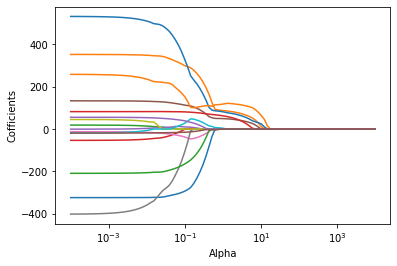

In [142]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Alpha')
plt.ylabel('Cofficients')

When alpha is equal to (10^1.0101), there are only three predictors left in the model. These 3 predictors are Hits, CRuns, CRBI.

In [127]:
pd.Series(coefs[37], index=X.columns)

AtBat       0.000000
Hits       11.744354
HmRun       0.000000
Runs        0.000000
RBI         0.000000
Walks       0.000000
Years       0.000000
CAtBat      0.000000
CHits       0.000000
CHmRun      0.000000
CRuns      24.184622
CRBI       63.845891
CWalks      0.000000
PutOuts     0.000000
Assists     0.000000
Errors      0.000000
dtype: float64

### Cross Validation Lasso

We now split the samples into a training set and a test set in order to estimate the test error. We perform 10-fold cross-validation to choose the best alpha, refit the mode, compute the associated test error and print the best models coefficients .

In [134]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

# print best alpha
print(lassocv.alpha_)

2.2410206769492604


In [135]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))


111160.39367053009

In [136]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

AtBat      0.000000
Hits       0.951516
HmRun      0.000000
Runs       0.000000
RBI        0.402763
Walks      2.774631
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.268635
CRuns      0.000000
CRBI       0.492185
CWalks     0.000000
PutOuts    0.394770
Assists    0.000000
Errors    -0.000000
dtype: float64

According to the result above, there are 6 predictors left in the model: Hits, RBI, Walks, CHmRun, CRBI, PutOuts

## 1.2 Ridge

Visualize coefficient trajectories.

Text(0, 0.5, 'Cofficients')

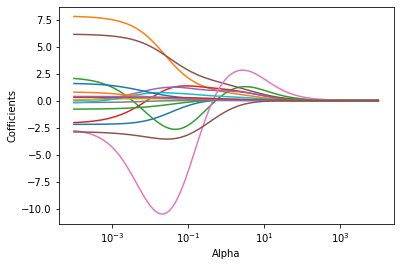

In [144]:
alphas =  10**np.linspace(4,-4,100)
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Alpha')
plt.ylabel('Cofficients')

In [145]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [146]:

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.5214008287999684

We use cross-validation to find the optimal vaule of the regularization penalty: alpha = 0.5214008287999684

In [148]:
ridge_best = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge_best.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

104844.29995340966

The coefficient estimates at optimal value of the regularization penalty

In [149]:
ridge_best.fit(X, y)
pd.Series(ridge_best.coef_, index = X.columns)

AtBat      0.033721
Hits       0.981428
HmRun     -0.038134
Runs       1.143750
RBI        0.934665
Walks      1.812665
Years      0.485253
CAtBat     0.011082
CHits      0.062819
CHmRun     0.427031
CRuns      0.127428
CRBI       0.131643
CWalks     0.042022
PutOuts    0.189778
Assists    0.042177
Errors    -1.611301
dtype: float64

## 2 

Short Answer. Explain in your own words the bias-variance tradeoff.What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

Bias is the difference between the average prediction of our model and the correct value which we are trying to predict.Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. The bias–variance tradeoff is the property of a set of predictive models: models with a lower bias have a higher variance, and models with a higher bias have a lower variance.

What role does regularization play in this tradeoff? Regularization can penalize the model and lower the variance.It negates(lasso) or minimizes(lasso & ridge) the effect of predictor columns with large outliers, by penalizing their regression coefficients. In this way, the expected error will decrease. 

In the question 1, if we use all the predictor without penalty, the model will end up with high variance and low bias, leading over-fitting problem. After the use of Ridge or lasso, the variance of model will be lower.